<h2>Pandas Cheat Sheet</h2>
<h3>Topics Covered:</h3>
<ul>
    <li>Basic CRUD Operation</li>
    <li>Viewing DataFrame Info</li>
    <li>Regression</li>
</ul>

<h3>Create</h3>

In [2]:
# Let's start with an example of how regression might be performed for data representing
# the price of a stock over time

import pandas as pd

# Load the data into a pandas dataframe
df = pd.read_csv('AAPL.csv')

# The following lines demonstrate how to perform exploratory data analysis on the data
# Print the first 5 rows of the dataframe
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600


In [12]:
# Print the data types of each column along with the number of non-null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB
None


In [13]:
  # Print summary statistics for each column (for numeric columns only)
print(df.describe())

               Open          High           Low         Close     Adj Close  \
count  10468.000000  10468.000000  10468.000000  10468.000000  10468.000000   
mean      14.757987     14.921491     14.594484     14.763533     14.130431   
std       31.914174     32.289158     31.543959     31.929489     31.637275   
min        0.049665      0.049665      0.049107      0.049107      0.038329   
25%        0.283482      0.289286      0.276786      0.283482      0.235462   
50%        0.474107      0.482768      0.465960      0.475446      0.392373   
75%       14.953303     15.057143     14.692589     14.901964     12.835269   
max      182.630005    182.940002    179.119995    182.009995    181.511703   

             Volume  
count  1.046800e+04  
mean   3.308489e+08  
std    3.388418e+08  
min    0.000000e+00  
25%    1.237768e+08  
50%    2.181592e+08  
75%    4.105794e+08  
max    7.421641e+09  


In [14]:
  # Print summary statistics for each column (for non-numeric columns only)
print(df.describe(include='object'))

              Date
count        10468
unique       10468
top     1980-12-12
freq             1


In [21]:
'''
Accessing columns in a pandas dataframe - columns are the keys
- In many cases, if a column intends to represent dates, the type might need to be cast to datetime
- if the type is 'object' it may or may not be in datetime, and may need to be cast as such.
- 'YYYY-MM-DD' is the a common format for dates in pandas
'''

df['Date'] = pd.to_datetime(df['Date'])

# 'Date' column will now be of type datetime64
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB
None


In [22]:
# Access multiple columns by passing a list of column names
print(df[['Open', 'Close']])

             Open       Close
0        0.128348    0.128348
1        0.122210    0.121652
2        0.113281    0.112723
3        0.115513    0.115513
4        0.118862    0.118862
...           ...         ...
10463  132.869995  131.880005
10464  133.130005  132.759995
10465  134.289993  135.429993
10466  132.080002  130.059998
10467  130.070007  131.559998

[10468 rows x 2 columns]


Mean Squared Error (MSE): 158.1165
Root Mean Squared Error (RMSE): 12.5744


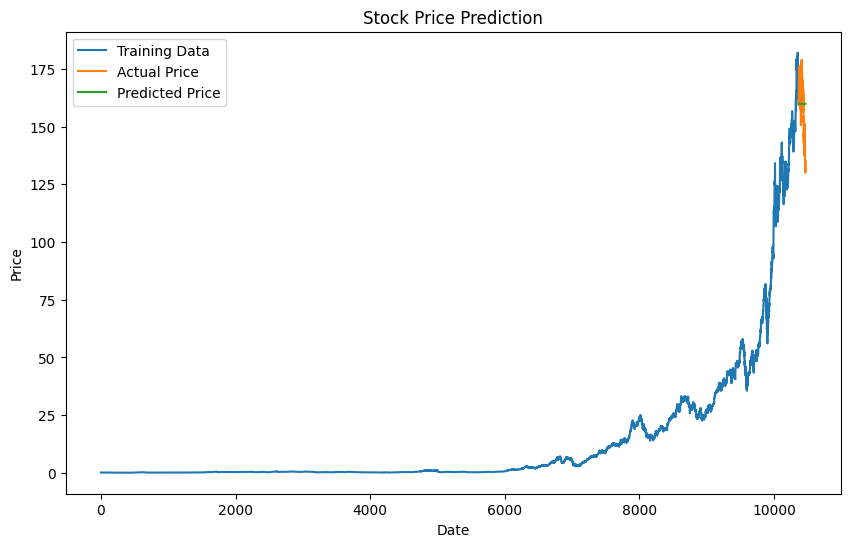

In [3]:
# Now, let's perform some actual analysis and regression on the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_data = df['Close'][:len(df) - 100]  # closing prices up from beginnning up to last 100 data points
test_data = df['Close'][-100:]  # last 100 data points for testing

# Create and fit the ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the testing data
predictions = model_fit.forecast(steps=len(test_data))

# Evaluate the model's performance
mse = mean_squared_error(test_data, predictions)  # measure average squared difference between actual vs predicted values
rmse = np.sqrt(mse)  
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Visualize the actual and predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Price')
plt.plot(test_data.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()